https://github.com/campusx-official/ipl-win-probability-predictor/blob/main/app.py

## IPL DATA (2008-2019) Complete

In [1]:
## Importing Basic Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("ggplot")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import seaborn as sns

c:\users\abhay\anaconda3\envs\ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
## Loading Dataset - Matches
matches = pd.read_csv('matches.csv')

In [3]:
## Loading Dataset  - Deliveries
deliveries = pd.read_csv('deliveries.csv')

#### EDA

In [4]:
matches.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [5]:
matches.shape

(756, 18)

In [6]:
deliveries.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [7]:
deliveries.shape

(179078, 21)

## DATA PREP

**Task**: Predict the Winning Team (Second Inning of The Match)

**Expected Features For Prediction**
1. Current Score (2nd Innings) 
2. First Inning Total Score (Target)
3. Bating Team (Team 1)
4. Bowling Team (Team 2)
5. Overs Completed 
6. Wickets Our
7. Venue

8. result (1:win 0:lose)



***

We Have Two Datasets `Matches` and `Deliveries`. 

* Matches: Contains Details For Each Match. <br>
It has features like: ['city','team1', 'team2', 'toss_winner', 'toss_decision', 'result','dl_applied','winner' ] that will help to predict winner.

* Deliveries: Contains Details For Each Ball Bowled In the match <br>
It has features like: ['inning','batting_team', 'bowling_team','over', 'ball','is_super_over','total_runs','player_dismissed'] that will help to predict winner.

All Remaining Columns Doesn't help in building model.

#### Extracting Total Score of First Innings

In [8]:
total_runs = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [9]:
total_runs

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [10]:
first_innings_scores = total_runs[total_runs['inning'] == 1]

In [11]:
first_innings_scores

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [12]:
## Combining Both Dataset Based On `match_id`
first_innings_scores_df = matches.merge(first_innings_scores[['match_id','total_runs']],left_on='id',right_on='match_id')

In [13]:
first_innings_scores_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157


In [14]:
first_innings_scores_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'total_runs'],
      dtype='object')

In [15]:
first_innings_scores_df.shape

(756, 20)

#### Team 1 and Team 2 (Current Playing Teams Only)

In [16]:
first_innings_scores_df.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

###### Observations
* There are some teams that doesn't play right now so we will replace them with new team name or remove them.

In [17]:
## Copy of data
temp = first_innings_scores_df.copy()

In [18]:
## Current Playing Teams (Till 2021 IPL Season)
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

## Replacing Old Team Names With New One's
temp['team1'] = temp['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
temp['team2'] = temp['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')


temp['team1'] = temp['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
temp['team2'] = temp['team2'].str.replace('Delhi Daredevils','Delhi Capitals')



In [19]:
temp.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Rising Pune Supergiants'], dtype=object)

In [20]:
## Removing All The Teams That Doesn't Play Now
temp = temp[(temp['team1'].isin(teams)) & (temp['team2'].isin(teams))]

In [21]:
temp.team1.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [22]:
first_innings_scores_df = temp

In [23]:
first_innings_scores_df.team1.value_counts()

Sunrisers Hyderabad            97
Mumbai Indians                 92
Kings XI Punjab                83
Chennai Super Kings            83
Royal Challengers Bangalore    76
Kolkata Knight Riders          76
Delhi Capitals                 70
Rajasthan Royals               64
Name: team1, dtype: int64

#### Removing Data That Doesn't Produce Any Result

In [24]:
first_innings_scores_df.shape

(641, 20)

In [25]:
### Checking Result
first_innings_scores_df.result.value_counts()

normal       630
tie            8
no result      3
Name: result, dtype: int64

In [26]:
### dl_applied
first_innings_scores_df.dl_applied.value_counts()

0    626
1     15
Name: dl_applied, dtype: int64

We Need to take care of these two as well. There Are Total 23 Rows That Contains No Result or Result With The Help of Algo.

In [27]:
first_innings_scores_df = first_innings_scores_df[first_innings_scores_df['dl_applied']==0]
first_innings_scores_df = first_innings_scores_df[first_innings_scores_df['result']!='no result']

In [28]:
first_innings_scores_df.shape

(623, 20)

In [29]:
first_innings_scores_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'match_id', 'total_runs'],
      dtype='object')

In [30]:
first_innings_scores_df = first_innings_scores_df[['city','winner','total_runs','match_id']]

In [31]:
first_innings_scores_df.head()

,city,winner,total_runs,match_id
0,Hyderabad,Sunrisers Hyderabad,207,1
4,Bangalore,Royal Challengers Bangalore,157,5
6,Mumbai,Mumbai Indians,178,7
7,Indore,Kings XI Punjab,148,8
9,Mumbai,Mumbai Indians,158,10


#### Merging Deliveries with First_innings_scores_df (Based On Match_ID)

In [32]:
df=first_innings_scores_df.merge(deliveries,on='match_id')

In [33]:
## Extracting 2nd Innings Data
df = df[df['inning']==2]

In [34]:
df.shape

(72386, 24)

In [35]:
df.head()

,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
128,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
129,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


#### Calculating Runs Left To Achieve The Target

In [36]:
df['current_score'] = df.groupby('match_id').cumsum()['total_runs_y']

In [37]:
df['runs_left'] = df['total_runs_x']-df['current_score']+1

In [38]:
df.head(3)

,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN,1,207
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,207
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,207


#### Calculating Balls Left For Achieving Target

In [39]:
df['ball_left'] = 126 - (df['over']*6 + df['ball'])

#### Current Run Rate

In [40]:
df['crr'] = (df['current_score']*6)/(120-df['ball_left'])

In [41]:
df['crr'].head()

125    6.0
126    3.0
127    2.0
128    4.5
129    8.4
Name: crr, dtype: float64

#### Required Run Rate

In [42]:
df['rrr'] = round((df['runs_left']*6)/(df['ball_left']),3)

In [43]:
df['rrr'].head()

125    10.437
126    10.525
127    10.615
128    10.603
129    10.487
Name: rrr, dtype: float64

#### Wickets Left

In [44]:
df['player_dismissed'] = df['player_dismissed'].fillna('0')
df['player_dismissed'] = df['player_dismissed'].apply(lambda x:0 if x == "0" else 1)

df['player_dismissed']=df['player_dismissed'].astype('int')
wickets=df.groupby('match_id').cumsum()['player_dismissed'].values
df['wickets_left']=10-wickets

In [45]:
df['wickets_left'].head()

125    10
126    10
127    10
128    10
129    10
Name: wickets_left, dtype: int32

#### Result 

In [46]:
def result(row):
    if row['batting_team']==row['winner']:
        return 1
    else:
        return 0

In [47]:
df['result'] = df.apply(result,axis=1)

In [48]:
### Little Replacement
df.rename(columns={"total_runs_x":"total_runs"},inplace=True)

In [49]:
df.head()

,city,winner,total_runs,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,ball_left,crr,rrr,wickets_left,result
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,0,1,0,1,0,NaN,NaN,1,207,119,6.0,10.437,10,0
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,207,118,3.0,10.525,10,0
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,207,117,2.0,10.615,10,0
128,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,2,0,2,0,NaN,NaN,3,205,116,4.5,10.603,10,0
129,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,4,0,4,0,NaN,NaN,7,201,115,8.4,10.487,10,0


In [50]:
final_df = df[['batting_team','bowling_team','city','runs_left','ball_left','wickets_left','total_runs','crr','rrr','result']]

In [51]:
final_df.head()

,batting_team,bowling_team,city,runs_left,ball_left,wickets_left,total_runs,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,207,6.0,10.437,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,207,3.0,10.525,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,207,2.0,10.615,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,207,4.5,10.603,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,207,8.4,10.487,0


In [52]:
final_df.shape

(72386, 10)

In [53]:
### Removing Last Ball Data
final_df = final_df[final_df['ball_left']!=0]

In [54]:
final_df.isna().sum()

batting_team      0
bowling_team      0
city            830
runs_left         0
ball_left         0
wickets_left      0
total_runs        0
crr               0
rrr               0
result            0
dtype: int64

In [55]:
final_df['city'].mode()

0    Mumbai
dtype: object

In [56]:
final_df['city'] = final_df['city'].fillna(final_df['city'].mode())

In [57]:
## dropping all nan values
final_df.dropna(inplace=True)

In [58]:
final_df.isna().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
ball_left       0
wickets_left    0
total_runs      0
crr             0
rrr             0
result          0
dtype: int64

In [59]:
final_df.sample(3)

,batting_team,bowling_team,city,runs_left,ball_left,wickets_left,total_runs,crr,rrr,result
8590,Delhi Daredevils,Deccan Chargers,Hyderabad,131,112,10,142,9.000000,7.018,1
141527,Rajasthan Royals,Mumbai Indians,Mumbai,27,28,8,191,10.760870,5.786,1
60124,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,147,92,8,165,4.071429,9.587,0


### Feature Engineering

In [60]:
## Shuffeling The Dataframe
final_df = final_df.sample(final_df.shape[0])

In [61]:
## Splliting The Dataset
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

c:\users\abhay\anaconda3\envs\ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [63]:
X_train.shape,X_test.shape

((57052, 9), (14263, 9))

In [64]:
### One Hot Encoding 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ohe=ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


##### Model Building and Training Using Pipelines

In [65]:
from sklearn.pipeline import Pipeline

## MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## METRICS
from sklearn.metrics import accuracy_score

c:\users\abhay\anaconda3\envs\ml\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [66]:
pipe=Pipeline(steps=[
    ('step1',ohe),
    ('step2',LogisticRegression(solver='liblinear'))
])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.8007431816588375

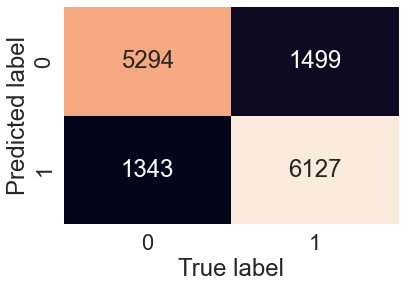

In [68]:
from sklearn.metrics import confusion_matrix, classification_report

sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      6793
           1       0.80      0.82      0.81      7470

    accuracy                           0.80     14263
   macro avg       0.80      0.80      0.80     14263
weighted avg       0.80      0.80      0.80     14263



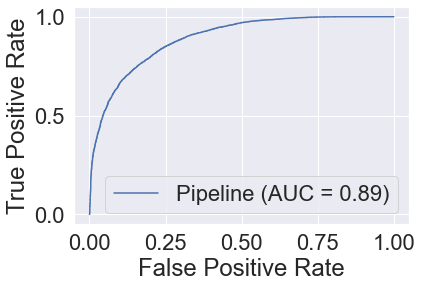

In [71]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(pipe,X_test,y_test)

##### Testing On Test and Custom Data

In [72]:
X_train.iloc[[91]]

,batting_team,bowling_team,city,runs_left,ball_left,wickets_left,total_runs,crr,rrr
61343,Delhi Daredevils,Deccan Chargers,Delhi,99,72,7,157,7.375,8.25


In [73]:
y_test.iloc[91]

1

1: Batting Team          |        0: Bowling Team

In [74]:
pipe.predict(X_test)[91]

1

In [75]:
pipe.predict_proba(X_test)[91]
##### 0,1

array([0.18979114, 0.81020886])

In [76]:
X_test.shape

(14263, 9)

In [ ]:
import pickle
0# pickle.dump(pipe,open('pipe.pkl','wb'))

##### Custom Data

In [ ]:
# ### Custom Data
# batting_team = input("Batting Team")
# bowling_team = input("Bowling Team")
# city = input("City")
# runs_left = int(input("Runs Left"))
# balls_left = int(input("balls Left"))
# wickets = int(input("wickets Left"))
# target = int(input("Target"))
# crr = float(input(""))
# rrr= float(input(""))
# data = pd.DataFrame({'batting_team':[batting_team],'bowling_team':[bowling_team],'city':[city],'runs_left':[runs_left],'ball_left':[balls_left],'wickets_left':[wickets],'total_runs':[target],'crr':[crr],'rrr':[rrr]})
# print(pipe.predict(data))

# result = pipe.predict_proba(data)
# loss = result[0][0]
# win = result[0][1]
# print(batting_team + "- " + str(round(win*100)) + "%")
# print(bowling_team + "- " + str(round(loss*100)) + "%")